# Liens

https://projecteuler.net/archives

https://www.overleaf.com/learn/latex/Fractions_and_Binomials latex

# 1 : Multiples of 3 and 5

If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23.

Find the sum of all the multiples of 3 or 5 below 1000.

In [1]:
def is_divided_by_3_or_5(nb) :
    return nb%3 == 0 or nb%5==0

all_below = [x for x in range(1,1000) if is_divided_by_3_or_5(x)]

sum(all_below)

233168

# 2 : Even Fibonacci numbers
Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be:

1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.

In [24]:
s = 0
terms = (1,2)
limit = 4e6

def next_fibo(terms) :
    return (terms[1], sum(terms))

while(terms[0] <= limit) :
    if terms[0] % 2 == 0 :
        s += terms[0]
        
    terms = next_fibo(terms)
    
s

4613732

In [11]:
a = (1,2)
for i in range(10):
    a = next_fibo(a)
    print(a[0])

2
3
5
8
13
21
34
55
89
144


# 3 : Largest prime factor
The prime factors of 13195 are 5, 7, 13 and 29.

What is the largest prime factor of the number 600851475143 ?

In [7]:
n = 2
N = 600851475143
K = N

# on teste les entiers dans l'ordre, donc si on trouve un nv qui divise K, il est premier
while n<N/2 and n<K :
    if K%n == 0 :
        print(n)
        K /= n
    else :
        n += 1
    

# le dernier facteur est le plus grand premier
K
        

71
839
1471


6857.0

# 4 : Largest palindrome product
A palindromic number reads the same both ways. The largest palindrome made from the product of two 2-digit numbers is 9009 = 91 × 99.

Find the largest palindrome made from the product of two 3-digit numbers.

In [4]:
import itertools
import numpy

In [11]:
def is_pal(s):
    for i in range(len(s)//2):
        if s[i] != s[-(i+1)] :
            return False
    return True

In [22]:
# il aurait fallu trouver une façon de parcourir dans l'ordre décroissant les produits et s'arreter des qu'une multiplication est un palindrome
a = list(range(900,999))

In [19]:
permutation = list(itertools.combinations_with_replacement(a,2))

In [20]:
all_perm = {k: numpy.prod(k) for k in permutation if is_pal(str(numpy.prod(k)))}

In [36]:
sorted(all_perm.items(), key=lambda item: item[1])

[((902, 909), 819918),
 ((902, 914), 824428),
 ((924, 932), 861168),
 ((916, 968), 886688),
 ((924, 962), 888888),
 ((913, 993), 906609)]

In [37]:
sorted(all_perm.items(), key=lambda item: item[1])[0][1]

819918

# 5 : Smallest multiple
2520 is the smallest number that can be divided by each of the numbers from 1 to 10 without any remainder.

What is the smallest positive number that is evenly divisible by all of the numbers from 1 to 20?

In [43]:
# 1*2*3*2^2*5*(2*3)*7*(2^3)*(3^2)*(2*5)*11*(2^2*3)*13*(2*7)*(3*5)*(2^4)*17*(2*3^2)*19*(2^2*5)
a = 2*3*5*7*11*13*17*19*2**3*3

In [44]:
for x in range(1,21):
    if a%x !=0 :
        print(x)

In [45]:
a/2

116396280.0

In [46]:
a

232792560

# 6 : Sum square difference
The sum of the squares of the first ten natural numbers is,

$$1^2 + 2^2 + ... + 10^2 = 385$$

The square of the sum of the first ten natural numbers is,

$$(1 + 2 + ... + 10)^2 = 55^2 = 3025$$

Hence the difference between the sum of the squares of the first ten natural numbers and the square of the sum is 3025 - 385 = 2640.

Find the difference between the sum of the squares of the first one hundred natural numbers and the square of the sum.

somme des carrés : 
$$\sum_{n=1}^{N} n^2 = \frac{N(N+1)(2N+1)}{6}$$

In [6]:
def square_sum(n) :
    return n*(n+1)*(2*n+1)/6

def sum_int(n):
    return n*(n+1)/2

def diff(n):
    return sum_int(n)**2 - square_sum(n)

In [7]:
diff(10)

2640.0

In [8]:
diff(100)

25164150.0

# 7 : 10001st prime
By listing the first six prime numbers: 2, 3, 5, 7, 11, and 13, we can see that the 6th prime is 13.

What is the 10 001st prime number?

La densité des nb premiers : 
$$\pi(n)=\frac{n}{ln(n)} $$

Graphiquement, on résout $$f(x)=\frac{x}{ln(x)}=10001$$ et on trouve x~116684

In [30]:
N = 116684
nb = N*[True]


In [31]:
nb[0] = False
nb[1] = False
nb[2] = True

In [35]:
from math import sqrt, ceil

for i in range(2, ceil(sqrt(N))):
    if nb[i] :
        k = 2*i
        while k < N :
            nb[k] = False
            k += i
        
p = 0
for i in range(0, len(nb)) :
    if nb[i] :
        p += 1
        
        if p == 10001 :
            print(p, i)
            
    
            
print(p, i)

10001 104743
11016 116683


In [12]:
from math import sqrt, ceil
ceil(sqrt(N))

342

In [33]:
nb[0:10]

[False, False, True, True, False, True, False, True, False, False]

# 8 : Largest product in a series
The four adjacent digits in the 1000-digit number that have the greatest product are 9 × 9 × 8 × 9 = 5832.

    73167176531330624919225119674426574742355349194934
    96983520312774506326239578318016984801869478851843
    85861560789112949495459501737958331952853208805511
    12540698747158523863050715693290963295227443043557
    66896648950445244523161731856403098711121722383113
    62229893423380308135336276614282806444486645238749
    30358907296290491560440772390713810515859307960866
    70172427121883998797908792274921901699720888093776
    65727333001053367881220235421809751254540594752243
    52584907711670556013604839586446706324415722155397
    53697817977846174064955149290862569321978468622482
    83972241375657056057490261407972968652414535100474
    82166370484403199890008895243450658541227588666881
    16427171479924442928230863465674813919123162824586
    17866458359124566529476545682848912883142607690042
    24219022671055626321111109370544217506941658960408
    07198403850962455444362981230987879927244284909188
    84580156166097919133875499200524063689912560717606
    05886116467109405077541002256983155200055935729725
    71636269561882670428252483600823257530420752963450

Find the thirteen adjacent digits in the 1000-digit number that have the greatest product. What is the value of this product?

In [57]:
texte = """73167176531330624919225119674426574742355349194934
96983520312774506326239578318016984801869478851843
85861560789112949495459501737958331952853208805511
12540698747158523863050715693290963295227443043557
66896648950445244523161731856403098711121722383113
62229893423380308135336276614282806444486645238749
30358907296290491560440772390713810515859307960866
70172427121883998797908792274921901699720888093776
65727333001053367881220235421809751254540594752243
52584907711670556013604839586446706324415722155397
53697817977846174064955149290862569321978468622482
83972241375657056057490261407972968652414535100474
82166370484403199890008895243450658541227588666881
16427171479924442928230863465674813919123162824586
17866458359124566529476545682848912883142607690042
24219022671055626321111109370544217506941658960408
07198403850962455444362981230987879927244284909188
84580156166097919133875499200524063689912560717606
05886116467109405077541002256983155200055935729725
71636269561882670428252483600823257530420752963450
"""
A = texte.replace("\n","")

nb = 13

In [58]:
sum(map(int, A[2:2+nb]))

49

In [79]:
import numpy

thirt = [(numpy.prod(list(map(int, A[i:i+nb]))),A[i:i+nb])  for i in range(len(A)-nb) ]
    

In [80]:
max(thirt, key = lambda x : x[0])[0]

23514624000

# 9 : Special Pythagorean triplet

A Pythagorean triplet is a set of three natural numbers, a < b < c, for which,

$$a^2 + b^2 = c^2$$

For example, $3^2 + 4^2 = 9 + 16 = 25 = 52$.

There exists exactly one Pythagorean triplet for which a + b + c = 1000.
Find the product abc.

In [90]:
import math
a = 2
b = 3

for a in range(1, 500) :
    for b in range(1, 500) :
        c = math.sqrt(a**2+b**2)
        
        if c.is_integer() and a+b+c==1000:
            print(a*b*c, (a,b,c))

31875000.0 (200, 375, 425.0)
31875000.0 (375, 200, 425.0)


# 10 : Summation of primes

The sum of the primes below 10 is 2 + 3 + 5 + 7 = 17.

Find the sum of all the primes below two million.

In [97]:
L = int(2e6)

In [98]:
from math import sqrt, ceil

def primes(N) :
    nb = N*[True]
    
    nb[0] = False
    nb[1] = False
    nb[2] = True
    
    for i in range(2, ceil(sqrt(N))):
        if nb[i] :
            k = 2*i
            while k < N :
                nb[k] = False
                k += i
                
    return nb

In [99]:
p_list = primes(L)
sum([i for i in range(L) if p_list[i]])

142913828922

# 11 : Largest product in a grid

# 12 : Highly divisible triangular number

The sequence of triangle numbers is generated by adding the natural numbers. So the 7th triangle number would be 1 + 2 + 3 + 4 + 5 + 6 + 7 = 28. The first ten terms would be:

1, 3, 6, 10, 15, 21, 28, 36, 45, 55, ...

Let us list the factors of the first seven triangle numbers:

 1: 1
 3: 1,3
 6: 1,2,3,6
10: 1,2,5,10
15: 1,3,5,15
21: 1,3,7,21
28: 1,2,4,7,14,28
We can see that 28 is the first triangle number to have over five divisors.

What is the value of the first triangle number to have over five hundred divisors?

In [2]:
2**499

1636695303948070935006594848413799576108321023021532394741645684048066898202337277441635046162952078575443342063780035504608628272942696526664263794688

In [2]:
import math
k = (-1+math.sqrt(1+4*2**500))/2

In [5]:
tri(int(k)) == 2**499

False

In [ ]:
s = 2**499
deb = 1809248999998999985236571382597547741403729285950012244985313150203330215820
for k in range(deb,deb+int(1e40), int(1e5)):
    if tri(k) > s:
        print(k)
        break

In [5]:
def tri(n):
    return 0

def nb_div(n):
    nb = 2
    for i in range(2,int(n/2)+1) :
        if n%i == 0:
            nb+=1
            
    return nb

In [6]:
nb_div(76576500)

576

In [20]:
def first(N):
    tri = 1
    i = 1
    k = 0

    while k < N:
        i += 1
        tri += i
        k = nb_div(tri)
        
    return tri
    

In [74]:
# first(500)
nb_div(1e8)

81

In [3]:
import numpy

def nbdiv(n):
    nb = 2
    for i in range(2,int(n/2)) :
        if n%i == 0:
            nb+=1
            
    return nb

def tri(n) :
    return int(n*(n+1)/2)
            
k = 1
p = k

while nbdiv(k) < 10:
    p += 1
    k += p
    

k=1e8
#print(k, nbdiv(k))

    
        

In [ ]:
x = [tri(k) for k in range(50)]
y = [nbdiv(k) for k in x]

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame()

In [ ]:
df["x"] = pd.Series(x)
df["y"] = pd.Series(y)
df["z"] = (df.x/2000).map(int)

In [ ]:
d = df.groupby("z").y.sum()
d.plot()
d

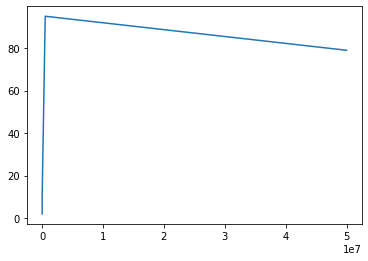

In [40]:
import matplotlib.pyplot as plt
plt.plot(x,y)

In [35]:
x = [tri(k) for k in range(100,1000)]
y = [nbdiv(k) for k in x]

In [ ]:
x

In [37]:
max(y)

144

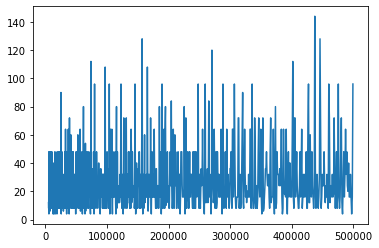

In [38]:
import matplotlib.pyplot as plt
plt.plot(x,y)

In [75]:
x = [k for k in range(1,19)]


In [76]:
import numpy as np

np.prod(x)

6402373705728000

In [96]:
def primes(n):
    primfac = []
    d = 2
    while d*d <= n:
        while (n % d) == 0:
            primfac.append(d)  # supposing you want multiple factors repeated
            n //= d
        d += 1
    if n > 1:
       primfac.append(n)
    return primfac

In [99]:
primes(500)

[2, 2, 5, 5, 5]

In [ ]:
2 * 5 * 10 * 25

In [100]:
3**24*5**4*7**9*19

135339974929113938983125

In [117]:
tri(6e11) > 135339974929113938983125

True

## Avec sage-math :)

In [4]:
tri = 1
for k in range(2, int(1e9)):
    tri += k
    
    if len(divisors(tri)) > 500 :
        print(k, tri)
        break

12375 76576500


# 13 : Large sum


In [81]:
text = """37107287533902102798797998220837590246510135740250
46376937677490009712648124896970078050417018260538
74324986199524741059474233309513058123726617309629
91942213363574161572522430563301811072406154908250
23067588207539346171171980310421047513778063246676
89261670696623633820136378418383684178734361726757
28112879812849979408065481931592621691275889832738
44274228917432520321923589422876796487670272189318
47451445736001306439091167216856844588711603153276
70386486105843025439939619828917593665686757934951
62176457141856560629502157223196586755079324193331
64906352462741904929101432445813822663347944758178
92575867718337217661963751590579239728245598838407
58203565325359399008402633568948830189458628227828
80181199384826282014278194139940567587151170094390
35398664372827112653829987240784473053190104293586
86515506006295864861532075273371959191420517255829
71693888707715466499115593487603532921714970056938
54370070576826684624621495650076471787294438377604
53282654108756828443191190634694037855217779295145
36123272525000296071075082563815656710885258350721
45876576172410976447339110607218265236877223636045
17423706905851860660448207621209813287860733969412
81142660418086830619328460811191061556940512689692
51934325451728388641918047049293215058642563049483
62467221648435076201727918039944693004732956340691
15732444386908125794514089057706229429197107928209
55037687525678773091862540744969844508330393682126
18336384825330154686196124348767681297534375946515
80386287592878490201521685554828717201219257766954
78182833757993103614740356856449095527097864797581
16726320100436897842553539920931837441497806860984
48403098129077791799088218795327364475675590848030
87086987551392711854517078544161852424320693150332
59959406895756536782107074926966537676326235447210
69793950679652694742597709739166693763042633987085
41052684708299085211399427365734116182760315001271
65378607361501080857009149939512557028198746004375
35829035317434717326932123578154982629742552737307
94953759765105305946966067683156574377167401875275
88902802571733229619176668713819931811048770190271
25267680276078003013678680992525463401061632866526
36270218540497705585629946580636237993140746255962
24074486908231174977792365466257246923322810917141
91430288197103288597806669760892938638285025333403
34413065578016127815921815005561868836468420090470
23053081172816430487623791969842487255036638784583
11487696932154902810424020138335124462181441773470
63783299490636259666498587618221225225512486764533
67720186971698544312419572409913959008952310058822
95548255300263520781532296796249481641953868218774
76085327132285723110424803456124867697064507995236
37774242535411291684276865538926205024910326572967
23701913275725675285653248258265463092207058596522
29798860272258331913126375147341994889534765745501
18495701454879288984856827726077713721403798879715
38298203783031473527721580348144513491373226651381
34829543829199918180278916522431027392251122869539
40957953066405232632538044100059654939159879593635
29746152185502371307642255121183693803580388584903
41698116222072977186158236678424689157993532961922
62467957194401269043877107275048102390895523597457
23189706772547915061505504953922979530901129967519
86188088225875314529584099251203829009407770775672
11306739708304724483816533873502340845647058077308
82959174767140363198008187129011875491310547126581
97623331044818386269515456334926366572897563400500
42846280183517070527831839425882145521227251250327
55121603546981200581762165212827652751691296897789
32238195734329339946437501907836945765883352399886
75506164965184775180738168837861091527357929701337
62177842752192623401942399639168044983993173312731
32924185707147349566916674687634660915035914677504
99518671430235219628894890102423325116913619626622
73267460800591547471830798392868535206946944540724
76841822524674417161514036427982273348055556214818
97142617910342598647204516893989422179826088076852
87783646182799346313767754307809363333018982642090
10848802521674670883215120185883543223812876952786
71329612474782464538636993009049310363619763878039
62184073572399794223406235393808339651327408011116
66627891981488087797941876876144230030984490851411
60661826293682836764744779239180335110989069790714
85786944089552990653640447425576083659976645795096
66024396409905389607120198219976047599490197230297
64913982680032973156037120041377903785566085089252
16730939319872750275468906903707539413042652315011
94809377245048795150954100921645863754710598436791
78639167021187492431995700641917969777599028300699
15368713711936614952811305876380278410754449733078
40789923115535562561142322423255033685442488917353
44889911501440648020369068063960672322193204149535
41503128880339536053299340368006977710650566631954
81234880673210146739058568557934581403627822703280
82616570773948327592232845941706525094512325230608
22918802058777319719839450180888072429661980811197
77158542502016545090413245809786882778948721859617
72107838435069186155435662884062257473692284509516
20849603980134001723930671666823555245252804609722
53503534226472524250874054075591789781264330331690"""

In [91]:
s = str(sum([int(x) for x in text.split() ]))[:10]

In [92]:
s

'5537376230'

In [95]:
sum([int(x) for x in text.split()][:])

5537376230390876637302048746832985971773659831892672

# 14 : Longest Collatz sequence

The following iterative sequence is defined for the set of positive integers:

n → n/2 (n is even)
n → 3n + 1 (n is odd)

Using the rule above and starting with 13, we generate the following sequence:

13 → 40 → 20 → 10 → 5 → 16 → 8 → 4 → 2 → 1
It can be seen that this sequence (starting at 13 and finishing at 1) contains 10 terms. Although it has not been proved yet (Collatz Problem), it is thought that all starting numbers finish at 1.

Which starting number, under one million, produces the longest chain?

NOTE: Once the chain starts the terms are allowed to go above one million.

In [134]:
collatz_map = {1:1}

def collatz_next(k) :
    if k%2 == 0 :
        return k/2
    else :
        return 3*k+1
    
def collatz(n):
    if not n in collatz_map:
        collatz_map[n] = 1 + collatz(collatz_next(n))

    return collatz_map[n]

In [135]:
collatz(13)

10

In [136]:
collatz(1)

1

In [141]:
max([(x, collatz(x)) for x in range(1, int(1e6))], key=lambda x : x[1])

(837799, 525)

# 15 : Lattice paths

<p>Starting in the top left corner of a 2×2 grid, and only being able to move to the right and down, there are exactly 6 routes to the bottom right corner.</p>
<div class="center">
<img src="https://projecteuler.net/project/images/p015.png" class="dark_img" alt="" /></div>
<p>How many such routes are there through a 20×20 grid?</p>

In [161]:
chemin_map = {(1,1):2}

def chemin(nligne,ncol) :
    pair = tuple(sorted((nligne,ncol)))
    
    if pair in chemin_map :
        nb = chemin_map[pair]
    
    elif nligne == 1:
        nb = ncol+1
    
    elif ncol == 1 :
        nb = nligne+1
        
    else :
        nb = chemin(nligne-1, ncol) + chemin(nligne, ncol-1)
    
    chemin_map[pair] = nb
    return nb

In [162]:
chemin(2,2)

6

In [163]:
chemin(20,20)

137846528820

# 16 : Power digit sum


<p>2<sup>15</sup> = 32768 and the sum of its digits is 3 + 2 + 7 + 6 + 8 = 26.</p>
<p>What is the sum of the digits of the number 2<sup>1000</sup>?</p>


In [166]:
sum([int(x) for x in str(2**1000)])

1366

# 17 : Number letter counts

<p>If the numbers 1 to 5 are written out in words: one, two, three, four, five, then there are 3 + 3 + 5 + 4 + 4 = 19 letters used in total.</p>
<p>If all the numbers from 1 to 1000 (one thousand) inclusive were written out in words, how many letters would be used? </p>
<br /><p class="note"><b>NOTE:</b> Do not count spaces or hyphens. For example, 342 (three hundred and forty-two) contains 23 letters and 115 (one hundred and fifteen) contains 20 letters. The use of "and" when writing out numbers is in compliance with British usage.</p>

In [211]:
to_19 = [0,3,3,5,4,4,3,5,5,4,3,6,6,8,8,7,7,9,8,8]
tens = [0,3,6,6,5,5,5,7,6,6]
hundred = 7
thousand = 11


def letters(i) :
    nb = 0
    
    if int(i/100):
        nb += hundred + to_19[int(i/100)]
        
        if i%100 != 0:
            nb += 3
    
    k = i%100
    
    if k>=20 :
        nb += tens[int(k/10)] + to_19[k%10]
        
    else :
        nb += to_19[k]
    
    #print(i, nb, "hundred", to_19[int(i/100)], "tens", int(k/10), tens[int(k/10)])
    return nb

def total():
    total = 0
    for i in range(1,1000):
        total += letters(i)

    return total + thousand
        
total()

21124

In [204]:
letters(342)

342 23 hundred 5 tens 4 5


23

In [205]:
letters(115)

115 20 hundred 3 tens 1 3


20

In [206]:
letters(100)

100 10 hundred 3 tens 0 0


10

In [207]:
letters(999)

999 24 hundred 4 tens 9 6


24

# 18 : Maximum path sum I



<p>By starting at the top of the triangle below and moving to adjacent numbers on the row below, the maximum total from top to bottom is 23.</p>
<p class="monospace center"><span class="red"><b>3</b></span><br /><span class="red"><b>7</b></span> 4<br />
2 <span class="red"><b>4</b></span> 6<br />
8 5 <span class="red"><b>9</b></span> 3</p>
<p>That is, 3 + 7 + 4 + 9 = 23.</p>
<p>Find the maximum total from top to bottom of the triangle below:</p>
<center>75<br />
95 64<br />
17 47 82<br />
18 35 87 10<br />
20 04 82 47 65<br />
19 01 23 75 03 34<br />
88 02 77 73 07 63 67<br />
99 65 04 28 06 16 70 92<br />
41 41 26 56 83 40 80 70 33<br />
41 48 72 33 47 32 37 16 94 29<br />
53 71 44 65 25 43 91 52 97 51 14<br />
70 11 33 28 77 73 17 78 39 68 17 57<br />
91 71 52 38 17 14 91 43 58 50 27 29 48<br />
63 66 04 68 89 53 67 30 73 16 69 87 40 31<br />
04 62 98 27 23 09 70 98 73 93 38 53 60 04 23</center>
<p class="note"><b>NOTE:</b> As there are only 16384 routes, it is possible to solve this problem by trying every route. However, <a href="problem=67">Problem 67</a>, is the same challenge with a triangle containing one-hundred rows; it cannot be solved by brute force, and requires a clever method! ;o)</p>

In [41]:
tri = """75
95 64
17 47 82
18 35 87 10
20 04 82 47 65
19 01 23 75 03 34
88 02 77 73 07 63 67
99 65 04 28 06 16 70 92
41 41 26 56 83 40 80 70 33
41 48 72 33 47 32 37 16 94 29
53 71 44 65 25 43 91 52 97 51 14
70 11 33 28 77 73 17 78 39 68 17 57
91 71 52 38 17 14 91 43 58 50 27 29 48
63 66 04 68 89 53 67 30 73 16 69 87 40 31
04 62 98 27 23 09 70 98 73 93 38 53 60 04 23""".split("\n")

data = [[int(x) for x in line.split()] for line in tri]

In [37]:
data

[[75],
 [95, 64],
 [17, 47, 82],
 [18, 35, 87, 10],
 [20, 4, 82, 47, 65],
 [19, 1, 23, 75, 3, 34],
 [88, 2, 77, 73, 7, 63, 67],
 [99, 65, 4, 28, 6, 16, 70, 92],
 [41, 41, 26, 56, 83, 40, 80, 70, 33],
 [41, 48, 72, 33, 47, 32, 37, 16, 94, 29],
 [53, 71, 44, 65, 25, 43, 91, 52, 97, 51, 14],
 [70, 11, 33, 28, 77, 73, 17, 78, 39, 68, 17, 57],
 [91, 71, 52, 38, 17, 14, 91, 43, 58, 50, 27, 29, 48],
 [63, 66, 4, 68, 89, 53, 67, 30, 73, 16, 69, 87, 40, 31],
 [4, 62, 98, 27, 23, 9, 70, 98, 73, 93, 38, 53, 60, 4, 23]]

In [3]:
from binarytree import tree, Node

In [12]:
def compute_sum_subtree(data, line=0, col=0):
    if line == len(data) - 1:
        return data[line][col]
    
    else :
        return data[line][col] + max(
            compute_sum_subtree(data, line+1, col), 
            compute_sum_subtree(data, line+1, col+1))

In [24]:
compute_sum_subtree(data)

1074

In [ ]:
def build_tree(data, line=0, col=0):
    root = Node(data[line][col])
    
    if line < len(data) - 1:
        root.left = build_tree(data, line+1, col)
        root.right = build_tree(data, line+1, col+1)
            
    return root
    

In [5]:
t = build_tree(data[:4]) # pour vérifier, on ne prend que les 4 premiers etages

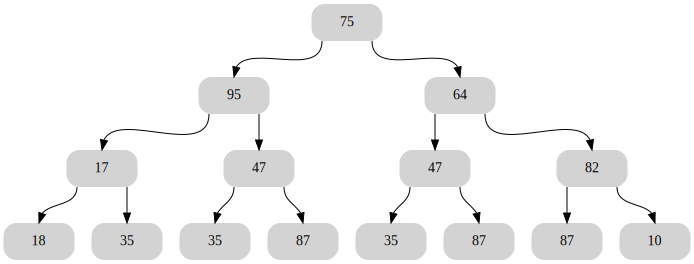

In [6]:
t

In [9]:
t.value

75

# 19 : Counting sundays


<p>You are given the following information, but you may prefer to do some research for yourself.</p>
<ul><li>1 Jan 1900 was a Monday.</li>
<li>Thirty days has September,<br />
April, June and November.<br />
All the rest have thirty-one,<br />
Saving February alone,<br />
Which has twenty-eight, rain or shine.<br />
And on leap years, twenty-nine.</li>
<li>A leap year occurs on any year evenly divisible by 4, but not on a century unless it is divisible by 400.</li>
</ul><p>How many Sundays fell on the first of the month during the twentieth century (1 Jan 1901 to 31 Dec 2000)?</p>


In [51]:
import pandas as pd

In [52]:
d = pd.date_range(start='1/1/1901', end='31/12/2000')

In [58]:
len(d[(d.day == 1) & (d.day_of_week == 6)])

171

# 20 : Factorial digit sum

<p><i>n</i>! means <i>n</i> × (<i>n</i> − 1) × ... × 3 × 2 × 1</p>
<p>For example, 10! = 10 × 9 × ... × 3 × 2 × 1 = 3628800,<br />and the sum of the digits in the number 10! is 3 + 6 + 2 + 8 + 8 + 0 + 0 = 27.</p>
<p>Find the sum of the digits in the number 100!</p>


In [4]:
import math
sum([int(x) for x in str(math.factorial(100))])

648

# 21 : Amicable numbers

<p>Let d(<i>n</i>) be defined as the sum of proper divisors of <i>n</i> (numbers less than <i>n</i> which divide evenly into <i>n</i>).<br />
If d(<i>a</i>) = <i>b</i> and d(<i>b</i>) = <i>a</i>, where <i>a</i> ≠ <i>b</i>, then <i>a</i> and <i>b</i> are an amicable pair and each of <i>a</i> and <i>b</i> are called amicable numbers.</p>
<p>For example, the proper divisors of 220 are 1, 2, 4, 5, 10, 11, 20, 22, 44, 55 and 110; therefore d(220) = 284. The proper divisors of 284 are 1, 2, 4, 71 and 142; so d(284) = 220.</p>
<p>Evaluate the sum of all the amicable numbers under 10000.</p>

In [15]:
def d(n):
    div = []
    for k in range(1,int(n/2)+1):
        if n%k == 0:
            div.append(k)
    
    return sum(div)

In [10]:
d(220)

284

In [23]:
div_map = {}
pairs = set()

for k in range(1,10001):
    if not k in div_map:
        div_map[k] = d(k)
    
    b = div_map[k]
    
    if not b in div_map:
        div_map[b] = d(b)
    
    
    if div_map[b] == k and b!=k:
        pairs.add(tuple(sorted((k,b))))
 
print(pairs)
sum([p[0]+p[1] for p in pairs])

{(2620, 2924), (5020, 5564), (6232, 6368), (1184, 1210), (220, 284)}


31626

# 22 : Names scores

<p>Using <a href="project/resources/p022_names.txt">names.txt</a> (right click and 'Save Link/Target As...'), a 46K text file containing over five-thousand first names, begin by sorting it into alphabetical order. Then working out the alphabetical value for each name, multiply this value by its alphabetical position in the list to obtain a name score.</p>
<p>For example, when the list is sorted into alphabetical order, COLIN, which is worth 3 + 15 + 12 + 9 + 14 = 53, is the 938th name in the list. So, COLIN would obtain a score of 938 × 53 = 49714.</p>
<p>What is the total of all the name scores in the file?</p>


In [85]:
import pandas as pd
df = pd.read_csv("p022_names.txt", lineterminator=",", sep=" ", header = None)

# df = df.dropna()
df.head()

0
0       MARY
1   PATRICIA
2      LINDA
3    BARBARA
4  ELIZABETH

In [86]:
df.tail()

0
5158      ELDEN
5159     DORSEY
5160     DARELL
5161  BRODERICK
5162     ALONSO

In [87]:
def val(word) :
    return sum([ord(letter)-ord('A') +1 for letter in word])

In [88]:
val("COLIN")

53

In [94]:
df.loc[3300:3305,:]

0
3300         PAZ
3301       OLENE
3302          NA
3303     MERRILL
3304  MARGHERITA
3305      MANDIE

In [93]:
df[df[0].isnull() == True]

df[df[0].isnull() == True] = "NA" # le prenom"NA" est remplacé par Nan...!

In [95]:
df["value"] = df.iloc[:,0].apply(val)

In [96]:
df.sample()

0  value
2270  SHAVON     79

In [97]:
df = df.sort_values(0).reset_index()

In [98]:
df.head()

index      0  value
0   2700  AARON     49
1   1582  ABBEY     35
2   1040  ABBIE     19
3    693   ABBY     30
4   4841  ABDUL     40

In [99]:
df["score"] = (df.index + 1)*df.value 

In [100]:
df.head()

index      0  value  score
0   2700  AARON     49     49
1   1582  ABBEY     35     70
2   1040  ABBIE     19     57
3    693   ABBY     30    120
4   4841  ABDUL     40    200

In [101]:
df.tail()

index        0  value   score
5158   1713     ZORA     60  309540
5159   1509  ZORAIDA     74  381840
5160   1852     ZULA     60  309660
5161   2186   ZULEMA     78  402636
5162   2063    ZULMA     73  376899

In [102]:
df[df[0] == "COLIN"]

index      0  value  score
937   4472  COLIN     53  49714

In [103]:
df.score.sum()

871198282

# 23 : Non-abundant sums

<p>A perfect number is a number for which the sum of its proper divisors is exactly equal to the number. For example, the sum of the proper divisors of 28 would be 1 + 2 + 4 + 7 + 14 = 28, which means that 28 is a perfect number.</p>
<p>A number <var>n</var> is called deficient if the sum of its proper divisors is less than <var>n</var> and it is called abundant if this sum exceeds <var>n</var>.</p>

<p>As 12 is the smallest abundant number, 1 + 2 + 3 + 4 + 6 = 16, the smallest number that can be written as the sum of two abundant numbers is 24. By mathematical analysis, it can be shown that all integers greater than 28123 can be written as the sum of two abundant numbers. However, this upper limit cannot be reduced any further by analysis even though it is known that the greatest number that cannot be expressed as the sum of two abundant numbers is less than this limit.</p>
<p>Find the sum of all the positive integers which cannot be written as the sum of two abundant numbers.</p>


In [22]:
ab_numbers = []

for n in range(28123):
    div = [k for k in range(1,int(n/2)+1) if n%k == 0 ]
    
    if sum(div)>n :
        ab_numbers.append(n)

In [32]:
import itertools

ab_sum = set(sorted([x[0]+x[1] for x in itertools.product(ab_numbers, ab_numbers) if x[0]+x[1] < 28123]))

In [29]:
sum([x for x in range(1,28123) if x not in ab_sum])

4179871

In [ ]:
list(ab_sum)[-100:]

In [35]:
[x for x in range(1,28123) if x not in ab_sum][-1]

20161

# 24 : Lexicographic permutations

<p>A permutation is an ordered arrangement of objects. For example, 3124 is one possible permutation of the digits 1, 2, 3 and 4. If all of the permutations are listed numerically or alphabetically, we call it lexicographic order. The lexicographic permutations of 0, 1 and 2 are:</p>
<p class="center">012   021   102   120   201   210</p>
<p>What is the millionth lexicographic permutation of the digits 0, 1, 2, 3, 4, 5, 6, 7, 8 and 9?</p>


https://docs.python.org/fr/3.9/library/itertools.html#itertools.permutations

In [1]:
import itertools

In [13]:
a = list(itertools.permutations(range(10)))[int(1e6)-1]

In [14]:
int(''.join(map(str,a)))

2783915460

# 25 : 1000-digit Fibonacci number

<p>The Fibonacci sequence is defined by the recurrence relation:</p>
<blockquote>F<sub><i>n</i></sub> = F<sub><i>n</i>−1</sub> + F<sub><i>n</i>−2</sub>, where F<sub>1</sub> = 1 and F<sub>2</sub> = 1.</blockquote>
<p>Hence the first 12 terms will be:</p>
<blockquote>F<sub>1</sub> = 1<br />
F<sub>2</sub> = 1<br />
F<sub>3</sub> = 2<br />
F<sub>4</sub> = 3<br />
F<sub>5</sub> = 5<br />
F<sub>6</sub> = 8<br />
F<sub>7</sub> = 13<br />
F<sub>8</sub> = 21<br />
F<sub>9</sub> = 34<br />
F<sub>10</sub> = 55<br />
F<sub>11</sub> = 89<br />
F<sub>12</sub> = 144</blockquote>
<p>The 12th term, F<sub>12</sub>, is the first term to contain three digits.</p>
<p>What is the index of the first term in the Fibonacci sequence to contain 1000 digits?</p>


In [11]:
fibo = [0,1,1]
def next_fibo() :
    fibo.append(fibo[-1]+fibo[-2])
    

In [19]:
while len(str(fibo[-1])) < 1000 :
    next_fibo()
    
len(fibo)-1

4782

In [12]:
for i in range(12):
    next_fibo()
fibo

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

# 26 : Reciprocal cycles


<p>A unit fraction contains 1 in the numerator. The decimal representation of the unit fractions with denominators 2 to 10 are given:</p>
<blockquote>
<table><tr><td><sup>1</sup>/<sub>2</sub></td><td>= </td><td>0.5</td>
</tr><tr><td><sup>1</sup>/<sub>3</sub></td><td>= </td><td>0.(3)</td>
</tr><tr><td><sup>1</sup>/<sub>4</sub></td><td>= </td><td>0.25</td>
</tr><tr><td><sup>1</sup>/<sub>5</sub></td><td>= </td><td>0.2</td>
</tr><tr><td><sup>1</sup>/<sub>6</sub></td><td>= </td><td>0.1(6)</td>
</tr><tr><td><sup>1</sup>/<sub>7</sub></td><td>= </td><td>0.(142857)</td>
</tr><tr><td><sup>1</sup>/<sub>8</sub></td><td>= </td><td>0.125</td>
</tr><tr><td><sup>1</sup>/<sub>9</sub></td><td>= </td><td>0.(1)</td>
</tr><tr><td><sup>1</sup>/<sub>10</sub></td><td>= </td><td>0.1</td>
</tr></table></blockquote>
<p>Where 0.1(6) means 0.166666..., and has a 1-digit recurring cycle. It can be seen that <sup>1</sup>/<sub>7</sub> has a 6-digit recurring cycle.</p>
<p>Find the value of <i>d</i> &lt; 1000 for which <sup>1</sup>/<sub><i>d</i></sub> contains the longest recurring cycle in its decimal fraction part.</p>


In [32]:
s = str(numerical_approx(1/583, prec=500))

In [33]:
sub = s[100:105]
idx_sub = s.find(sub, 105)
print(s, sub, idx_sub-100)

0.00171526586620926243567753001715265866209262435677530017152658662092624356775300171526586620926243567753001715265866209262435677530017152658662092624357 56775 26


In [37]:
s.find(sub, 23)- s.find(sub)

26

In [40]:
m = 1
d = 1
for i in range(2,1000):
    s = str(numerical_approx(1/i, prec=100000))
    sub = s[100:105]
    idx_sub = s.find(sub, 105)
    #print(i,s, sub, idx_sub-100)
    
    if idx_sub-100 > m :
        length = idx_sub-100
        if s[100:idx_sub] == s[idx_sub:idx_sub+length]:
            m = length
            d = i
        
print(d, m)


983 982


# 27 : Quadratic primes

<p>Euler discovered the remarkable quadratic formula:</p>
<p class="center">$n^2 + n + 41$</p>
<p>It turns out that the formula will produce 40 primes for the consecutive integer values $0 \le n \le 39$. However, when $n = 40, 40^2 + 40 + 41 = 40(40 + 1) + 41$ is divisible by 41, and certainly when $n = 41, 41^2 + 41 + 41$ is clearly divisible by 41.</p>
<p>The incredible formula $n^2 - 79n + 1601$ was discovered, which produces 80 primes for the consecutive values $0 \le n \le 79$. The product of the coefficients, −79 and 1601, is −126479.</p>
<p>Considering quadratics of the form:</p>
<blockquote>
$n^2 + an + b$, where $|a| &lt; 1000$ and $|b| \le 1000$<br /><br /><div>where $|n|$ is the modulus/absolute value of $n$<br />e.g. $|11| = 11$ and $|-4| = 4$</div>
</blockquote>
<p>Find the product of the coefficients, $a$ and $b$, for the quadratic expression that produces the maximum number of primes for consecutive values of $n$, starting with $n = 0$.</p>

In [36]:
import math

def is_prime(n):
    if n<2 :
        return False
    
    for k in range(2, int(math.sqrt(n))+1):
        if n % k == 0:
            return False
    return True

In [31]:
is_prime(17)

True

In [32]:
is_prime(121)

False

In [33]:
def nb_prime(a,b):
    n = 0
    while(is_prime(n**2+a*n+b)):
        n += 1
    
    return n

In [34]:
nb_prime(-79,1601)

80

In [40]:
nb_prime(1,41)

40

In [42]:
import itertools

m = 40
a_best = 1
b_best = 41

r = 1000

for a,b in itertools.product(range(-r,r+1), range(-r, r+1)):
    nb = nb_prime(a,b)
    
    if nb > m :
        m = nb
        a_best = a
        b_best = b
    
print(m, a_best, b_best, a_best*b_best)

71 -61 971 -59231


# 28 : Number spiral diagonals

<p>Starting with the number 1 and moving to the right in a clockwise direction a 5 by 5 spiral is formed as follows:</p>
<p class="monospace center"><span class="red"><b>21</b></span> 22 23 24 <span class="red"><b>25</b></span><br />
20  <span class="red"><b>7</b></span>  8  <span class="red"><b>9</b></span> 10<br />
19  6  <span class="red"><b>1</b></span>  2 11<br />
18  <span class="red"><b>5</b></span>  4  <span class="red"><b>3</b></span> 12<br /><span class="red"><b>17</b></span> 16 15 14 <span class="red"><b>13</b></span></p>
<p>It can be verified that the sum of the numbers on the diagonals is 101.</p>
<p>What is the sum of the numbers on the diagonals in a 1001 by 1001 spiral formed in the same way?</p>


In [6]:
def sum_diag(n):
    if n == 1 :
        return 1
    
    else :
        return 4*n*n - 6*(n-1) + sum_diag(n-2) # la somme des 4 nombres diagonaux du carré exterieur

In [8]:
sum_diag(1001)

669171001

# 29 : Distinct powers


<p>Consider all integer combinations of <i>a</i><sup><i>b</i></sup> for 2 ≤ <i>a</i> ≤ 5 and 2 ≤ <i>b</i> ≤ 5:</p>
<blockquote>2<sup>2</sup>=4, 2<sup>3</sup>=8, 2<sup>4</sup>=16, 2<sup>5</sup>=32<br />
3<sup>2</sup>=9, 3<sup>3</sup>=27, 3<sup>4</sup>=81, 3<sup>5</sup>=243<br />
4<sup>2</sup>=16, 4<sup>3</sup>=64, 4<sup>4</sup>=256, 4<sup>5</sup>=1024<br />
5<sup>2</sup>=25, 5<sup>3</sup>=125, 5<sup>4</sup>=625, 5<sup>5</sup>=3125<br /></blockquote>
<p>If they are then placed in numerical order, with any repeats removed, we get the following sequence of 15 distinct terms:</p>
<p class="center">4, 8, 9, 16, 25, 27, 32, 64, 81, 125, 243, 256, 625, 1024, 3125</p>
<p>How many distinct terms are in the sequence generated by <i>a</i><sup><i>b</i></sup> for 2 ≤ <i>a</i> ≤ 100 and 2 ≤ <i>b</i> ≤ 100?</p>


In [13]:
import itertools

len({x[0]**x[1] for x in itertools.product(range(2,101), range(2,101))})

9183

# 30 : Digit fifth powers

<p>Surprisingly there are only three numbers that can be written as the sum of fourth powers of their digits:</p>
<blockquote>1634 = 1<sup>4</sup> + 6<sup>4</sup> + 3<sup>4</sup> + 4<sup>4</sup><br />
8208 = 8<sup>4</sup> + 2<sup>4</sup> + 0<sup>4</sup> + 8<sup>4</sup><br />
9474 = 9<sup>4</sup> + 4<sup>4</sup> + 7<sup>4</sup> + 4<sup>4</sup></blockquote>
<p class="smaller">As 1 = 1<sup>4</sup> is not a sum it is not included.</p>
<p>The sum of these numbers is 1634 + 8208 + 9474 = 19316.</p>
<p>Find the sum of all the numbers that can be written as the sum of fifth powers of their digits.</p>


In [12]:
2**4+2**4+3**4

113

In [10]:
t = []

for k in range(2, 1000000):
    s = str(k)
    sum_pow = sum([int(x)**5 for x in s])
    if sum_pow == k:
        print(k)
        t.append(k)
    
    #elif sum_pow > k :
     #   print(">", sum_pow, k)
        
print(sum(t))

4150
4151
54748
92727
93084
194979
443839


# 30 : Coin sums

<p>In the United Kingdom the currency is made up of pound (£) and pence (p). There are eight coins in general circulation:</p>
<blockquote>1p, 2p, 5p, 10p, 20p, 50p, £1 (100p), and £2 (200p).</blockquote>
<p>It is possible to make £2 in the following way:</p>
<blockquote>1×£1 + 1×50p + 2×20p + 1×5p + 1×2p + 3×1p</blockquote>
<p>How many different ways can £2 be made using any number of coins?</p>


In [ ]:
a+2*b+5*c+10*d+20*e+50*f+100*g == 200
a in range(201)
b in range()


In [ ]:
import itertools

s = 0

for a,b,c,d,e,f,g in itertools.product(range(201), range(101), range(41), range(21), range(11), range(5), range(3)):
    if a+2*b+5*c+10*d+20*e+50*f+100*g == 200 :
        s +=1

print(s)

In [26]:
def nb_sum(remain = 200, coins = [1,2,5,10,20,50,100, 200]):
    #print(remain, coins)
    if remain ==0 :
        return 1
    
    else :
        return sum([nb_sum(remain - x, coins[:i+1])  for i,x in enumerate(coins) if remain>= x])

In [27]:
nb_sum(remain = 10, coins = [1])

1

In [28]:
nb_sum(remain = 10, coins = [1, 5])

3

In [29]:
nb_sum(remain = 10, coins = [1, 2, 5])

10

In [30]:
nb_sum()

73682

In [8]:
import itertools

for a,b,c in list(itertools.product(range(5),range(2), range(6)))[:10]:
    print(a,b,c)

0 0 0
0 0 1
0 0 2
0 0 3
0 0 4
0 0 5
0 1 0
0 1 1
0 1 2
0 1 3


# 32 : Pandigital products

<p>We shall say that an <var>n</var>-digit number is pandigital if it makes use of all the digits 1 to <var>n</var> exactly once; for example, the 5-digit number, 15234, is 1 through 5 pandigital.</p>

<p>The product 7254 is unusual, as the identity, 39 × 186 = 7254, containing multiplicand, multiplier, and product is 1 through 9 pandigital.</p>

<p>Find the sum of all products whose multiplicand/multiplier/product identity can be written as a 1 through 9 pandigital.</p>

<div class="note">HINT: Some products can be obtained in more than one way so be sure to only include it once in your sum.</div>


In [31]:
import itertools

In [35]:
list(itertools.permutations(range(1,5), r=4))[:5]

[(1, 2, 3, 4), (1, 2, 4, 3), (1, 3, 2, 4), (1, 3, 4, 2), (1, 4, 2, 3)]

In [61]:
def to_int(tab):
    return int(''.join(map(str, tab)))

In [62]:
all_l = itertools.permutations(range(1,10), r=9)

prod = []

for l in all_l :
    for x in range(1,8):
        for y in range(x+1, 9):
            if to_int(l[:x]) * to_int(l[x:y]) == to_int(l[y:10]):
                prod.append(l[y:])
                
print(prod)

[(5, 7, 9, 6), (5, 7, 9, 6), (4, 3, 9, 6), (7, 6, 3, 2), (6, 9, 5, 2), (5, 3, 4, 6), (7, 2, 5, 4), (7, 8, 5, 2), (5, 3, 4, 6), (5, 3, 4, 6), (4, 3, 9, 6), (5, 3, 4, 6), (7, 2, 5, 4), (6, 9, 5, 2), (7, 8, 5, 2), (5, 7, 9, 6), (7, 6, 3, 2), (5, 7, 9, 6)]


In [63]:
print(set(prod))

{(7, 2, 5, 4), (5, 3, 4, 6), (4, 3, 9, 6), (7, 8, 5, 2), (5, 7, 9, 6), (7, 6, 3, 2), (6, 9, 5, 2)}


In [ ]:
sum([to_int(x) for x in set(prod)])

In [60]:
a = [1,2,3]
sub_array(a,1,3)

23

# 33 : Digit cancelling fractions

<p>The fraction <sup>49</sup>/<sub>98</sub> is a curious fraction, as an inexperienced mathematician in attempting to simplify it may incorrectly believe that <sup>49</sup>/<sub>98</sub> = <sup>4</sup>/<sub>8</sub>, which is correct, is obtained by cancelling the 9s.</p>
<p>We shall consider fractions like, <sup>30</sup>/<sub>50</sub> = <sup>3</sup>/<sub>5</sub>, to be trivial examples.</p>
<p>There are exactly four non-trivial examples of this type of fraction, less than one in value, and containing two digits in the numerator and denominator.</p>
<p>If the product of these four fractions is given in its lowest common terms, find the value of the denominator.</p>


In [1]:
def to_int(tab):
    return int(''.join(map(str, tab)))

In [4]:
[1,2] == [1,2]

True

In [27]:
import itertools

frac = []

for l in itertools.product(range(1,10), range(1,10),range(1,10),range(1,10)) :
    
    if (l[0] in l[2:] or l[1] in l[2:]) and l[:2] != l[2:] :
        a = to_int(l[:2])
        b = to_int(l[2:])
        
        if a>9 and b >9:
        
            if l[0] == l[2]:
                #print(a,b,c,d)
                c = l[1]
                d = l[3]

                if d>0 and a/b == c/d:
                    frac.append(tuple(sorted((a,b))))

            if l[0] == l[3]:
                #print(a,b,c,d)
                c = l[1]
                d = l[2]

                if d>0 and a/b == c/d:
                    frac.append(tuple(sorted((a,b))))

            if l[1] == l[2]:
                #print(a,b,c,d)
                c = l[0]
                d = l[3]

                if d>0 and a/b == c/d:
                    frac.append(tuple(sorted((a,b))))

            if l[1] == l[3]:
                #print(a,b,c,d)
                c = l[0]
                d = l[2]

                if d>0 and a/b == c/d:
                    frac.append(tuple(sorted((a,b))))
    

In [28]:
frac = set(frac)
frac

{(16, 64), (19, 95), (26, 65), (49, 98)}

In [29]:
f = [1,1]
for x in frac :
    f[0] = f[0]*x[0]
    f[1] = f[1]*x[1]
    
f

[387296, 38729600]

# 34 : Digit factorials

<p>145 is a curious number, as 1! + 4! + 5! = 1 + 24 + 120 = 145.</p>
<p>Find the sum of all numbers which are equal to the sum of the factorial of their digits.</p>
<p class="smaller">Note: As 1! = 1 and 2! = 2 are not sums they are not included.</p>


In [1]:
fact_map = {0:1}

def fact(n) : 
    if not n in fact_map :
        fact_map[n] = n*fact(n-1)
    
    return fact_map[n]
        

def curious(n) :
    return sum([fact(int(x)) for x in str(n)]) == n

In [7]:
tab = [x for x in range(3, int(1e7)) if curious(x)]

In [8]:
tab

[145, 40585]

In [9]:
sum(tab)

40730

# 35 : Circular primes


<p>The number, 197, is called a circular prime because all rotations of the digits: 197, 971, and 719, are themselves prime.</p>
<p>There are thirteen such primes below 100: 2, 3, 5, 7, 11, 13, 17, 31, 37, 71, 73, 79, and 97.</p>
<p>How many circular primes are there below one million?</p>


In [1]:
[False]*3

[False, False, False]

In [5]:
def primes(N):
    tab = [True]*(N+1)
    
    tab[0] = False
    tab[1] = False
    
    for i in range(2, N+1):
        if tab[i] : # its a prime, lets mark all multiple as non prime
            k = i*2
            while k < N+1:
                tab[k] = False
                k += i
                
    return tab

In [8]:
[i for i,x in enumerate(primes(50)) if x]

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]

In [9]:
primes_m = primes(int(1e6))

In [19]:
import itertools
a = "12345"
for i,x in enumerate(a):
    print(a[i:]+a[:i])

12345
23451
34512
45123
51234


In [29]:
def is_circular(n, primes):
    s = str(n)
    for i in range(len(s)):
        if not primes[int(s[i:]+s[:i])]:
            return False
    return True

In [30]:
is_circular(197, primes_m)

True

In [31]:
is_circular(51, primes_m)

False

In [32]:
primes_tab = [i for i,x in enumerate(primes_m) if x]

circ = []

for x in primes_tab :
    if is_circular(x, primes_m):
        circ.append(x)
        
len(circ)

55

In [ ]:
circ

# 36 : Double-base palindromes

<p>The decimal number, 585 = 1001001001<sub>2</sub> (binary), is palindromic in both bases.</p>
<p>Find the sum of all numbers, less than one million, which are palindromic in base 10 and base 2.</p>
<p class="smaller">(Please note that the palindromic number, in either base, may not include leading zeros.)</p>


In [15]:
format(14, 'b')

'1110'

In [16]:
def is_pal(s) :
    for i in range(len(s)//2):
        if s[i] != s[-i-1]:
            return False
    return True

In [17]:
is_pal(str(112))

False

In [18]:
is_pal(str(1))

True

In [19]:
is_pal(str(121))

True

In [21]:
somme = 0
for i in range(1,int(1e6)):
    
    if is_pal(str(i)):
        if is_pal(format(i, 'b')) :
            somme += i
            
print(somme)

872187


# 37 : Truncatable primes


<p>The number 3797 has an interesting property. Being prime itself, it is possible to continuously remove digits from left to right, and remain prime at each stage: 3797, 797, 97, and 7. Similarly we can work from right to left: 3797, 379, 37, and 3.</p>
<p>Find the sum of the only eleven primes that are both truncatable from left to right and right to left.</p>
<p class="smaller">NOTE: 2, 3, 5, and 7 are not considered to be truncatable primes.</p>


In [3]:
def to_int(tab):
    return int(''.join(map(str, tab)))

In [1]:
def primes(N):
    tab = [True]*(N+1)
    
    tab[0] = False
    tab[1] = False
    
    for i in range(2, N+1):
        if tab[i] : # its a prime, lets mark all multiple as non prime
            k = i*2
            while k < N+1:
                tab[k] = False
                k += i
                
    return tab

In [2]:
tab = primes(int(1e6))

In [4]:
def is_trunc_prime(n): 
    s = str(n)
    
    for i in range(len(s)):
        if not tab[to_int(s[i:])] or  not tab[to_int(s[:len(s)-i])]:
            return False
        
    return True

In [7]:
is_trunc_prime(3597)

False

In [13]:
tab_prime = [i for i, x in enumerate(tab) if x and is_trunc_prime(i) and i>7]

In [15]:
sum(tab_prime)

748317

# 38 : Pandigital multiples

<p>Take the number 192 and multiply it by each of 1, 2, and 3:</p>
<blockquote>192 × 1 = 192<br />
192 × 2 = 384<br />
192 × 3 = 576</blockquote>
<p>By concatenating each product we get the 1 to 9 pandigital, 192384576. We will call 192384576 the concatenated product of 192 and (1,2,3)</p>
<p>The same can be achieved by starting with 9 and multiplying by 1, 2, 3, 4, and 5, giving the pandigital, 918273645, which is the concatenated product of 9 and (1,2,3,4,5).</p>
<p>What is the largest 1 to 9 pandigital 9-digit number that can be formed as the concatenated product of an integer with (1,2, ... , <var>n</var>) where <var>n</var> &gt; 1?</p>


In [25]:
def to_int(tab):
    return int(''.join(map(str, tab)))

In [42]:
def is_pan_mult(n):
    s = str(n)
    k = n

    while len(s) < 9:
        k += n
        s += str(k)

    if len(s) == 9 and to_int(sorted(s)) == 123456789:
        return to_int(s)
    
    else : return 0
    


In [43]:
is_pan_mult(192)

192384576

In [44]:
is_pan_mult(9)

918273645

In [50]:
tab = [is_pan_mult(x) for x in range(1, int(1e6)) ]

In [51]:
max(tab)

932718654

# 39 : Integer right triangles

<p>If <i>p</i> is the perimeter of a right angle triangle with integral length sides, {<i>a</i>,<i>b</i>,<i>c</i>}, there are exactly three solutions for <i>p</i> = 120.</p>
<p>{20,48,52}, {24,45,51}, {30,40,50}</p>
<p>For which value of <i>p</i> ≤ 1000, is the number of solutions maximised?</p>


In [4]:
import math
import itertools

In [36]:
def triangles(p = 120):
    tri = {}
    for i,j in itertools.combinations_with_replacement(range(2, p//2), 2):
        c = math.sqrt(i*i+j*j)

        if not c+i+j in tri :
            tri[c+i+j] = set()
        
        tri[c+i+j].add(tuple(sorted((i,j,int(c)))))
    return tri
        

In [37]:
triangles()[120]

{(20, 48, 52), (24, 45, 51), (30, 40, 50)}

In [39]:
t = sorted(triangles(1000).items(), key = lambda x : len(x[1]), reverse=True)
t[0]

(840.0,
 {(40, 399, 401),
  (56, 390, 394),
  (105, 360, 375),
  (120, 350, 370),
  (140, 336, 364),
  (168, 315, 357),
  (210, 280, 350),
  (240, 252, 348)})

In [ ]:
nb = 3 if 3 > 2 else 5

In [31]:
int(2.5)

2

# 40 : Champernowne's constant

<p>An irrational decimal fraction is created by concatenating the positive integers:</p>
<p class="center">0.12345678910<span class="red strong">1</span>112131415161718192021...</p>
<p>It can be seen that the 12<sup>th</sup> digit of the fractional part is 1.</p>
<p>If <i>d</i><sub><i>n</i></sub> represents the <i>n</i><sup>th</sup> digit of the fractional part, find the value of the following expression.</p>
<p class="center"><i>d</i><sub>1</sub> × <i>d</i><sub>10</sub> × <i>d</i><sub>100</sub> × <i>d</i><sub>1000</sub> × <i>d</i><sub>10000</sub> × <i>d</i><sub>100000</sub> × <i>d</i><sub>1000000</sub></p>


In [46]:
s = "."
i = 1

while len(s) < 1000001 :
    s += str(i)
    i += 1



In [48]:
s[2]

'2'

In [49]:
s[12]

'1'

In [50]:
int(s[1000000])*int(s[100000])*int(s[10000])*int(s[1000])*int(s[100])*int(s[10])*int(s[1])

210

# 41 : Pandigital prime


<p>We shall say that an <i>n</i>-digit number is pandigital if it makes use of all the digits 1 to <i>n</i> exactly once. For example, 2143 is a 4-digit pandigital and is also prime.</p>
<p>What is the largest <i>n</i>-digit pandigital prime that exists?</p>


In [1]:
import itertools

In [2]:
def primes(N):
    tab = [True]*(N+1)
    
    tab[0] = False
    tab[1] = False
    
    for i in range(2, N+1):
        if tab[i] : # its a prime, lets mark all multiple as non prime
            k = i*2
            while k < N+1:
                tab[k] = False
                k += i
                
    return tab

In [3]:
is_primes_tab = primes(987654321)

In [4]:
def to_int(tab):
    return int(''.join(map(str, tab)))

In [9]:
sup = 8
all_l = itertools.permutations(range(1,sup), r=sup-1)

pan = 0

for l in all_l :
    #print(to_int(l))
    if is_primes_tab[to_int(l)]:
        pan = to_int(l)
                
print(pan)

7652413


# 42 : Coded triangle numbers

<p>The <i>n</i><sup>th</sup> term of the sequence of triangle numbers is given by, <i>t<sub>n</sub></i> = ½<i>n</i>(<i>n</i>+1); so the first ten triangle numbers are:</p>
<p class="center">1, 3, 6, 10, 15, 21, 28, 36, 45, 55, ...</p>
<p>By converting each letter in a word to a number corresponding to its alphabetical position and adding these values we form a word value. For example, the word value for SKY is 19 + 11 + 25 = 55 = <i>t</i><sub>10</sub>. If the word value is a triangle number then we shall call the word a triangle word.</p>
<p>Using <a href="project/resources/p042_words.txt">words.txt</a> (right click and 'Save Link/Target As...'), a 16K text file containing nearly two-thousand common English words, how many are triangle words?</p>

In [1]:
import pandas as pd

df = pd.read_csv("p042_words.txt", lineterminator=",", sep = ";", header = None)
df.head()

0
0        A
1  ABILITY
2     ABLE
3    ABOUT
4    ABOVE

In [5]:
import math

def is_tri(word):
    s = sum([ord(letter)-ord('A')+1 for letter in word])
    
    delta_2 = 1+8*s
    
    # print(s, math.sqrt(delta_2))
    
    return delta_2 >= 0 and (math.sqrt(delta_2)-1)/2 == int((math.sqrt(delta_2)-1)/2)

In [3]:
[ord(letter)-ord('A') for letter in 'SKY']

[18, 10, 24]

In [4]:
is_tri('SKY')

55 21.0


True

In [6]:
df["code"] = df[0].map(is_tri)
df.head()

0   code
0        A   True
1  ABILITY   True
2     ABLE  False
3    ABOUT  False
4    ABOVE   True

In [7]:
df["code"].sum()

162

# 43 : Sub-string divisibility

<p>The number, 1406357289, is a 0 to 9 pandigital number because it is made up of each of the digits 0 to 9 in some order, but it also has a rather interesting sub-string divisibility property.</p>
<p>Let <i>d</i><sub>1</sub> be the 1<sup>st</sup> digit, <i>d</i><sub>2</sub> be the 2<sup>nd</sup> digit, and so on. In this way, we note the following:</p>
<ul><li><i>d</i><sub>2</sub><i>d</i><sub>3</sub><i>d</i><sub>4</sub>=406 is divisible by 2</li>
<li><i>d</i><sub>3</sub><i>d</i><sub>4</sub><i>d</i><sub>5</sub>=063 is divisible by 3</li>
<li><i>d</i><sub>4</sub><i>d</i><sub>5</sub><i>d</i><sub>6</sub>=635 is divisible by 5</li>
<li><i>d</i><sub>5</sub><i>d</i><sub>6</sub><i>d</i><sub>7</sub>=357 is divisible by 7</li>
<li><i>d</i><sub>6</sub><i>d</i><sub>7</sub><i>d</i><sub>8</sub>=572 is divisible by 11</li>
<li><i>d</i><sub>7</sub><i>d</i><sub>8</sub><i>d</i><sub>9</sub>=728 is divisible by 13</li>
<li><i>d</i><sub>8</sub><i>d</i><sub>9</sub><i>d</i><sub>10</sub>=289 is divisible by 17</li>
</ul><p>Find the sum of all 0 to 9 pandigital numbers with this property.</p>


In [8]:
def to_int(tab):
    return int(''.join(map(str, tab)))

In [19]:
def is_div(n):
    s = str(n)
    
    return (
        to_int(s[1:4])%2 == 0 and
        to_int(s[2:5])%3 == 0 and
        to_int(s[3:6])%5 == 0 and
        to_int(s[4:7])%7 == 0 and
        to_int(s[5:8])%11 == 0 and
        to_int(s[6:9])%13 == 0 and
        to_int(s[7:10])%17 == 0
    )

In [20]:
is_div(1406357289)

True

In [22]:
is_div(416357289)

False

In [25]:
import itertools

all_pan = itertools.permutations(range(0,10), r=10)

all_pan_div = [to_int(pan) for pan in all_pan if is_div(to_int(pan))]

sum(all_pan_div)

16695334890

# 44 : Pentagon numbers

<p>Pentagonal numbers are generated by the formula, P<sub><var>n</var></sub>=<var>n</var>(3<var>n</var>−1)/2. The first ten pentagonal numbers are:</p>
<p class="center">1, 5, 12, 22, 35, 51, 70, 92, 117, 145, ...</p>
<p>It can be seen that P<sub>4</sub> + P<sub>7</sub> = 22 + 70 = 92 = P<sub>8</sub>. However, their difference, 70 − 22 = 48, is not pentagonal.</p>
<p>Find the pair of pentagonal numbers, P<sub><var>j</var></sub> and P<sub><var>k</var></sub>, for which their sum and difference are pentagonal and D = |P<sub><var>k</var></sub> − P<sub><var>j</var></sub>| is minimised; what is the value of D?</p>

In [21]:
import math

pent_tab = [1,5]
def next_pent():
    pent_tab.append(2*pent_tab[-1]-pent_tab[-2]+3)
    
next_pent()

assert pent_tab[-1] == 12

for i in range(int(1e4)):
    next_pent()

def is_pen(p):
    delta = 1+24*p
    
    if delta >= 0 :
        return int((1+math.sqrt(delta))/6) == (1+math.sqrt(delta))/6
    
    else : return False
    
assert is_pen(145)
assert not is_pen(13)

def is_sum_diff_pen(pair):
    return is_pen(pair[1]-pair[0]) and is_pen(pair[1]+pair[0])

In [22]:
import itertools

min([pair[1]-pair[0] for pair in itertools.combinations(pent_tab, r=2) if is_sum_diff_pen(pair)])

5482660

# 45 : Triangular, pentagonal, and hexagonal

<p>Triangle, pentagonal, and hexagonal numbers are generated by the following formulae:</p>
<table><tr><td>Triangle</td>
<td> </td>
<td>T<sub><i>n</i></sub>=<i>n</i>(<i>n</i>+1)/2</td>
<td> </td>
<td>1, 3, 6, 10, 15, ...</td>
</tr><tr><td>Pentagonal</td>
<td> </td>
<td>P<sub><i>n</i></sub>=<i>n</i>(3<i>n</i>−1)/2</td>
<td> </td>
<td>1, 5, 12, 22, 35, ...</td>
</tr><tr><td>Hexagonal</td>
<td> </td>
<td>H<sub><i>n</i></sub>=<i>n</i>(2<i>n</i>−1)</td>
<td> </td>
<td>1, 6, 15, 28, 45, ...</td>
</tr></table><p>It can be verified that T<sub>285</sub> = P<sub>165</sub> = H<sub>143</sub> = 40755.</p>
<p>Find the next triangle number that is also pentagonal and hexagonal.</p>


In [23]:
import math

def is_pen(p):
    delta = 1+24*p
    
    if delta >= 0 :
        return int((1+math.sqrt(delta))/6) == (1+math.sqrt(delta))/6
    
    else : return False
    
assert is_pen(145)
assert not is_pen(13)

In [24]:
def is_hex(n) :
    delta = 1+8*n
    
    if delta >=0:
        return int((1+math.sqrt(delta))/4) == (1+math.sqrt(delta))/4
    
    else : return False
    
assert is_hex(190)
assert not is_hex(191)

In [31]:
tri_tab = [1,3]
def next_tri():
    tri_tab.append(tri_tab[-1]+len(tri_tab)+1)
    
next_tri()

assert tri_tab[-1] == 6

In [32]:
for i in range(282):
    next_tri()
    
assert tri_tab[-1] == 40755

next_tri()
    
while not(is_hex(tri_tab[-1]) and is_pen(tri_tab[-1])):
    next_tri()
    
tri_tab[-1]

1533776805

# 46 : Goldbach's other conjecture

<p>It was proposed by Christian Goldbach that every odd composite number can be written as the sum of a prime and twice a square.</p>
<p class="margin_left">9 = 7 + 2×1<sup>2</sup><br />
15 = 7 + 2×2<sup>2</sup><br />
21 = 3 + 2×3<sup>2</sup><br />
25 = 7 + 2×3<sup>2</sup><br />
27 = 19 + 2×2<sup>2</sup><br />
33 = 31 + 2×1<sup>2</sup></p>
<p>It turns out that the conjecture was false.</p>
<p>What is the smallest odd composite that cannot be written as the sum of a prime and twice a square?</p>


In [1]:
def primes(N):
    tab = [True]*(N+1)
    
    tab[0] = False
    tab[1] = False
    
    for i in range(2, N+1):
        if tab[i] : # its a prime, lets mark all multiple as non prime
            k = i*2
            while k < N+1:
                tab[k] = False
                k += i
                
    return tab

In [2]:
is_primes_tab = primes(int(1e6))

In [22]:
import math

def is_gold_or_prime(n):
    if is_primes_tab[n]:
        return True
    
    for k in range(1, int(math.sqrt(n/2))+1):
        if is_primes_tab[n-2*k*k]:
            return True
    
    return False

In [24]:
assert is_gold_or_prime(27)
assert is_gold_or_prime(33)
assert is_gold_or_prime(13)

In [25]:
is_gold_or_prime(57)

True

In [26]:
p = 9

while is_gold_or_prime(p):
    p += 2

print(p)

5777


# 47 : Distinct primes factors

<p>The first two consecutive numbers to have two distinct prime factors are:</p>
<p class="margin_left">14 = 2 × 7<br />15 = 3 × 5</p>
<p>The first three consecutive numbers to have three distinct prime factors are:</p>
<p class="margin_left">644 = 2² × 7 × 23<br />645 = 3 × 5 × 43<br />646 = 2 × 17 × 19.</p>
<p>Find the first four consecutive integers to have four distinct prime factors each. What is the first of these numbers?</p>

In [27]:
def primes(N):
    tab = [True]*(N+1)
    
    tab[0] = False
    tab[1] = False
    
    for i in range(2, N+1):
        if tab[i] : # its a prime, lets mark all multiple as non prime
            k = i*2
            while k < N+1:
                tab[k] = False
                k += i
                
    return tab

In [28]:
is_primes_tab = primes(int(1e6))

In [29]:
primes_tab = [k for k, x in enumerate(is_primes_tab) if x]

In [30]:
primes_tab[:5]

[2, 3, 5, 7, 11]

In [31]:
def prime_factors(n):
    k = 0
    factors = {}
    
    while n>1 :
        if n % primes_tab[k] == 0:
            factors[primes_tab[k]] = 0
        
        while n % primes_tab[k] == 0:
            n /= primes_tab[k]
            factors[primes_tab[k]] += 1
        
        k += 1
    return factors

In [32]:
prime_factors(644)

{2: 2, 7: 1, 23: 1}

In [34]:
len(prime_factors(644).items())

3

In [37]:
def find_seq(N = 3):

    i = 643
    seq = 0

    while seq < N:
        if len(prime_factors(i).items()) == N:
            seq += 1

        else :
            seq = 0
        
        i += 1
            
    return i-N

In [38]:
find_seq(3)

644

In [39]:
find_seq(4)

134043

# 48 : Self powers


<p>The series, 1<sup>1</sup> + 2<sup>2</sup> + 3<sup>3</sup> + ... + 10<sup>10</sup> = 10405071317.</p>
<p>Find the last ten digits of the series, 1<sup>1</sup> + 2<sup>2</sup> + 3<sup>3</sup> + ... + 1000<sup>1000</sup>.</p>


In [2]:
s = sum([x**x for x in range(1,1001)])

In [4]:
str(s)[-10:]

'9110846700'

In [3]:
a = 'abcd'
a[-2:]

'cd'

# 49 : Prime permutations

<p>The arithmetic sequence, 1487, 4817, 8147, in which each of the terms increases by 3330, is unusual in two ways: (i) each of the three terms are prime, and, (ii) each of the 4-digit numbers are permutations of one another.</p>
<p>There are no arithmetic sequences made up of three 1-, 2-, or 3-digit primes, exhibiting this property, but there is one other 4-digit increasing sequence.</p>
<p>What 12-digit number do you form by concatenating the three terms in this sequence?</p>


In [14]:
def primes(N):
    tab = [True]*(N+1)
    
    tab[0] = False
    tab[1] = False
    
    for i in range(2, N+1):
        if tab[i] : # its a prime, lets mark all multiple as non prime
            k = i*2
            while k < N+1:
                tab[k] = False
                k += i
                
    return tab

In [15]:
tab = [i for i,x in enumerate(primes(9999)) if i>999 and x]

In [16]:
tab[:10]

[1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061]

In [17]:
import itertools

In [18]:
def prime_permut(n):
    s = str(n)
    combi = []
    for c in itertools.permutations(s, 4):
        c_int = int(''.join(c))
        #print(c_int)
        
        if c_int in tab :
            combi.append(c_int)
    
    if len(combi) > 1:    
        return combi
    
    else : return []
    

In [19]:
for c in itertools.combinations(str(1487), 4):
    print(c)

('1', '4', '8', '7')


In [20]:
prime_permut(1487)

[1487, 1847, 4817, 4871, 8147, 8741, 7481, 7841]

In [ ]:
all_c = set()

for n in tab:
    s = str(n)
    combi = set()
    for c in itertools.permutations(s, 4):
        c_int = int(''.join(c))
        
        if c_int in tab :
            combi.add(c_int)
    
    if len(combi) >= 3:    
        all_c.add(tuple(sorted(combi)))
    
all_c
        

In [9]:
for x in itertools.combinations(range(4), r=3):
    print(x)

(0, 1, 2)
(0, 1, 3)
(0, 2, 3)
(1, 2, 3)


In [12]:
for combi in all_c :
    for idx in itertools.combinations(range(len(combi)), r=3):
        if combi[idx[1]] - combi[idx[0]] == combi[idx[2]] - combi[idx[1]]:
            print(combi[idx[0]], combi[idx[1]],combi[idx[2]])
            break

2969 6299 9629
1487 4817 8147


# 50 : Consecutive prime sum

<p>The prime 41, can be written as the sum of six consecutive primes:</p>
<div class="center">41 = 2 + 3 + 5 + 7 + 11 + 13</div>
<p>This is the longest sum of consecutive primes that adds to a prime below one-hundred.</p>
<p>The longest sum of consecutive primes below one-thousand that adds to a prime, contains 21 terms, and is equal to 953.</p>
<p>Which prime, below one-million, can be written as the sum of the most consecutive primes?</p>

In [1]:
def primes(N):
    tab = [True]*(N+1)
    
    tab[0] = False
    tab[1] = False
    
    for i in range(2, N+1):
        if tab[i] : # its a prime, lets mark all multiple as non prime
            k = i*2
            while k < N+1:
                tab[k] = False
                k += i
                
    return tab

In [2]:
is_prime_tab = primes(int(1e6))

primes_tab = [i for i,x in enumerate(is_prime_tab) if x] 

In [11]:
def find_max(pair) :
    i = 0
    s = pair[0]
    
    while s>0 and (s>=len(is_prime_tab) or not is_prime_tab[s]):
        s -= primes_tab[i]
        i += 1
    
    if s>0 and s<len(is_prime_tab) and is_prime_tab[s]:
        return (s,pair[1]-i)
    
    else :
        return (0,0)

In [12]:
import itertools

prime_sum = []

s = 0

# pc = itertools.accumulate(primes_tab)

for i,n in enumerate(primes_tab):
    s += n
    prime_sum.append((s, i+1))
    

max(list(map(find_max, prime_sum)), key = lambda x : x[1])

(997651, 543)